# **Model inference**

In [ ]:
import tensorflow as tf
import keras.backend as K
from keras.models import load_model
import pandas as pd
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import os

In [ ]:
TRAIN_DIR = r"C:\Users\mariy\Desktop\test\train_v2"
TEST_DIR = r"C:\Users\mariy\Desktop\test\test_v2"
MODEL_DIR =r"C:\Users\mariy\AppData\Local\Programs\Microsoft VS Code\model.h5"

In [ ]:
IMG_WIDTH = 768
IMG_HEIGHT = 768
IMG_CHANNELS = 3
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
epochs=10
batch_size=32
image_shape=(768, 768)
FAST_RUN=True # use for development only
FAST_PREDICTION=True # use for development only

In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

In [ ]:
model = load_model(MODEL_DIR,
                   custom_objects={'dice_coef':dice_coef})

In [ ]:
IMG_SIZE=128
# Get and resize test images
sample_submission = pd.read_csv(r"C:\Users\mariy\Desktop\test\sample_submission_v2.csv")
test_ids = sample_submission['ImageId'].unique().tolist()

X_test = np.zeros((sample_submission['ImageId'].nunique(), IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)
print('Getting and resizing test images ... ')

for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = fr"C:\Users\mariy\Desktop\test\test_v2//{id_}"
    img = imread(path)[:,:]
    img = resize(img, (IMG_SIZE, IMG_SIZE), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis = 0)
    X_test[n] = img

print('Done!')

print(X_test.shape)

Getting and resizing test images ... 


100%|██████████| 15606/15606 [21:16<00:00, 12.22it/s]

Done!
(15606, 128, 128, 3)


In [ ]:
preds_test = model.predict(X_test, verbose=1)

488/488 [==============================] - 3001s 6s/step


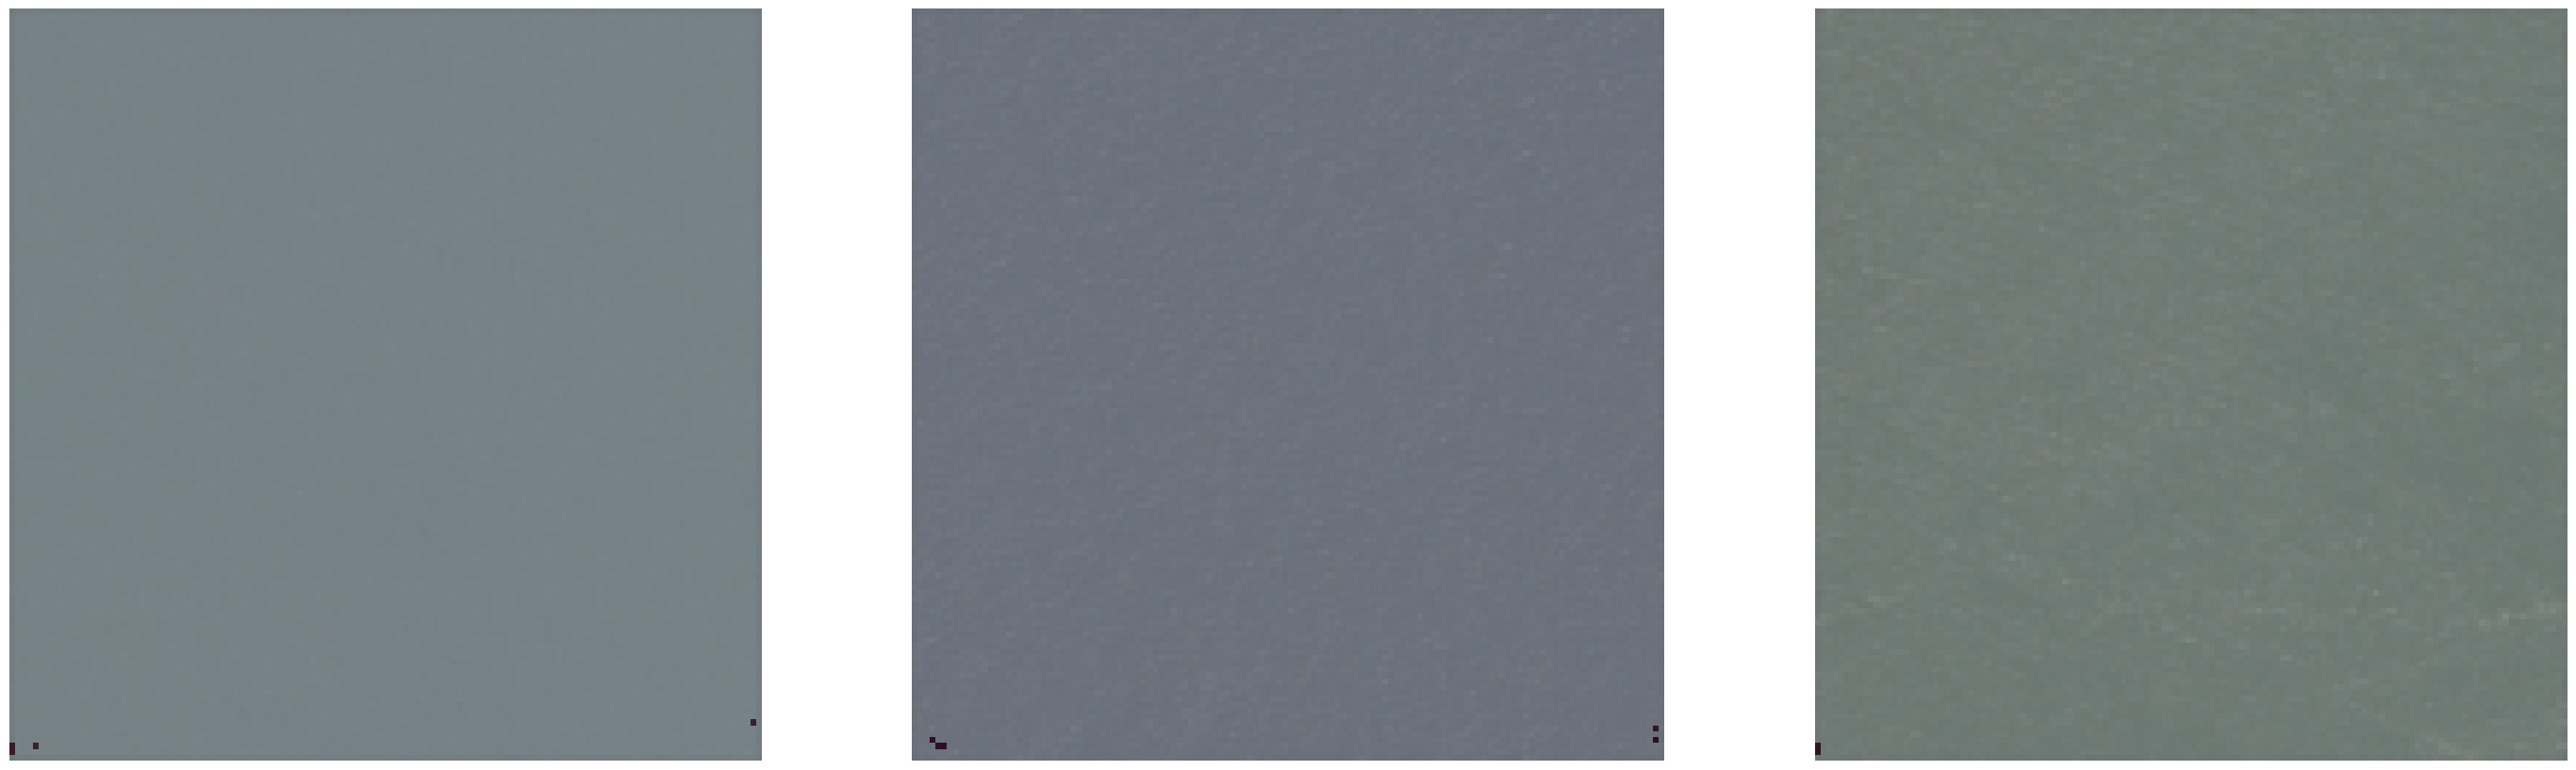

In [ ]:
threshold=0.5
max_images = 3
grid_width = 3

grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(35, 35))
for i, idx in enumerate(preds_test[:max_images]):
    ax = axs[i]
    img = X_test[i]
    ax.imshow(img)
    
    pred = (preds_test[i] > threshold).astype(np.float32)
    ax.imshow(pred, alpha=0.4, cmap="Reds")
    
    ax.axis('off')